In [4]:
import numpy as np

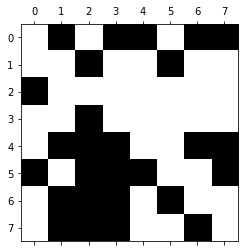

In [5]:
# first games played between NFC west and NFC east in 2020
A = np.array([[0,1,0,1,1,0,1,1],[0,0,1,0,0,1,0,0],[1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],[0,1,1,1,0,0,1,1],[1,0,1,1,1,0,0,1],[0,1,1,1,0,1,0,0],[0,1,1,1,0,0,1,0]])
# Order: 49ers, Seahwaks, Rams, Cardinals, Cowboys, Giants, WFT, Eagles

# Spy plot the matrix
import matplotlib.pylab as plt
message = plt.spy(A)

In [6]:
# Grab the size of the network
sizeOfNetwork = len(A)
# Remove loops (links to one's own webpage)
A = A - np.diag(np.diag(A))

In [7]:
alpha = 0.85 # teleportation parameter
rowSum = np.sum(A,1) # Compute the row sums
G = np.zeros((sizeOfNetwork,sizeOfNetwork)) # initalize the Google matrix 
for i in range(sizeOfNetwork):
    if (rowSum[i] == 0): # dangling node
       G[i,:] = np.ones((1,sizeOfNetwork))/sizeOfNetwork
    else:
       G[i,:] = alpha*A[i,:]/rowSum[i] + (1-alpha)/sizeOfNetwork
print('G = \n',G)

G = 
 [[0.01875 0.18875 0.01875 0.18875 0.18875 0.01875 0.18875 0.18875]
 [0.01875 0.01875 0.44375 0.01875 0.01875 0.44375 0.01875 0.01875]
 [0.86875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.01875 0.86875 0.01875 0.01875 0.01875 0.01875 0.01875]
 [0.01875 0.18875 0.18875 0.18875 0.01875 0.01875 0.18875 0.18875]
 [0.18875 0.01875 0.18875 0.18875 0.18875 0.01875 0.01875 0.18875]
 [0.01875 0.23125 0.23125 0.23125 0.01875 0.23125 0.01875 0.01875]
 [0.01875 0.23125 0.23125 0.23125 0.01875 0.01875 0.23125 0.01875]]


In [8]:
numberOfLoops = 100
v0 = np.zeros(sizeOfNetwork) # initial state
v0[np.random.randint(sizeOfNetwork)] = 1 # create a random webpage on which to start
v = v0
for i in range(numberOfLoops):
    v = v@G

In [18]:
teamNames = np.array(['49ers', 'Seahwaks', 'Rams', 'Cardinals', 'Cowboys', 'Giants', 'WFT', 'Eagles'])

iSort = np.argsort(-v)
# the -v gives us a reverse sort and np.argsort gives us the indices of the sort
print('Page        PageRank  \n====================')
for i in range(sizeOfNetwork):
    print(f'{teamNames[iSort[i]]:10}   {v[iSort[i]]:7.5f}')
    


Page        PageRank  
Rams         0.22696
49ers        0.22560
Cardinals    0.11922
Seahwaks     0.10529
WFT          0.08684
Eagles       0.08311
Giants       0.08195
Cowboys      0.07103
